In [1]:
import pandas as pd

In [2]:
data_path = "C:/Users/Katta's/PycharmProjects/data/usecase3/train.csv"
housing = pd.read_csv(data_path)

In [3]:
 house_obj= housing.select_dtypes(include=['object']).copy()

In [4]:
house_obj.drop(house_obj.columns[house_obj.isnull().any()],axis=1, inplace=True) 

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in house_obj.columns.values:
        le.fit(house_obj[col])
        house_obj[col]=le.transform(house_obj[col])

In [7]:
# All types except object
housing_int = housing.select_dtypes(exclude=['object']).copy()
# housing_cat1 = housing_cat.astype('int64',copy=False)
int_columns = housing_int.columns


In [8]:
from sklearn.preprocessing import StandardScaler
# Scaling training because of variance
ss = StandardScaler()
# scaling training data
housing_cat1_scaled = ss.fit_transform(housing_int)


c:\users\katta's\venv\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\katta's\venv\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [9]:
housing_cat1_scaled_df = pd.DataFrame(housing_cat1_scaled, columns=int_columns)

In [10]:
housing_t = pd.concat([house_obj, housing_cat1_scaled_df],axis= 1)


In [11]:
housing_t['GarageYrBlt'].fillna(housing_t['GarageYrBlt'].mean(), inplace=True)
housing_t['MasVnrArea'].fillna(housing_t['MasVnrArea'].mean(), inplace=True)
housing_t['LotFrontage'].fillna(housing_t['LotFrontage'].mean(), inplace=True)

In [12]:
housing_train = housing_t.dropna()
print(housing_train.columns)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition', 'Id', 'MSSubClass', 'LotFrontage',
       'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [13]:
train_x = housing_train.drop(['SalePrice', 'Id'],axis=1)
train_y = housing_train['SalePrice']
train_x.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [15]:
# Early stopping 
from keras.callbacks import EarlyStopping
_es_monitor = 'val_loss'
_es_patience = 10
es = EarlyStopping(monitor=_es_monitor, mode='min', verbose=1, patience=_es_patience)

In [43]:
#define batch size and number of epchos 
_batch_size = 32
_epochs = 500
_mc_model_location = 'v1_model.h5'
_mc_monitor = 'val_loss'
lr = 0.005
# Defining optimizer 
from keras.optimizers import SGD
_opt = SGD(lr)
# _opt = 'adam'
_loss = 'mean_squared_error'

In [44]:
# Model check point
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(Dense(64, activation='relu', kernel_initializer='normal'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
mc = ModelCheckpoint(_mc_model_location, monitor=_mc_monitor, mode='max', verbose=1, save_best_only=True)

In [45]:
model.compile(loss=_loss, optimizer=_opt, metrics=['accuracy'])

In [46]:
history = model.fit(train_x.values, train_y.values, validation_split=0.20,
                    epochs=_epochs, batch_size = len(train_x), verbose=1, callbacks=[es,mc])

Train on 1168 samples, validate on 292 samples
Epoch 1/500


1168/1168 [==============================] - 0s 378us/step - loss: 1.5097 - acc: 0.0000e+00 - val_loss: 1.1114 - val_acc: 0.0000e+00



Epoch 00001: val_loss improved from -inf to 1.11141, saving model to v1_model.h5


Epoch 2/500
1168/1168 [==============================] - 0s 7us/step - loss: 1.1306 - acc: 0.0000e+00 - val_loss: 1.0883 - val_acc: 0.0000e+00



Epoch 00002: val_loss did not improve from 1.11141
Epoch 3/500
1168/1168 [==============================] - 0s 8us/step - loss: 1.0673 - acc: 0.0000e+00 - val_loss: 1.0741 - val_acc: 0.0000e+00



Epoch 00003: val_loss did not improve from 1.11141
Epoch 4/500
1168/1168 [==============================] - 0s 9us/step - loss: 1.0718 - acc: 0.0000e+00 - val_loss: 1.0619 - val_acc: 0.0000e+00



Epoch 00004: val_loss did not improve from 1.11141
Epoch 5/500
1168/1168 [==============================] - 0s 7us/step - loss: 1.0147 - acc: 0.0000e+00 - val_loss: 1.0520 - val_acc: 0.0000e+00



Epoch 00005: val_loss did not improve from 1.11141
Epoch 6/500
1168/1168 [==============================] - 0s 9us/step - loss: 1.0076 - acc: 0.0000e+00 - val_loss: 1.0433 - val_acc: 0.0000e+00



Epoch 00006: val_loss did not improve from 1.11141
Epoch 7/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.9982 - acc: 0.0000e+00 - val_loss: 1.0351 - val_acc: 0.0000e+00



Epoch 00007: val_loss did not improve from 1.11141
Epoch 8/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.9665 - acc: 0.0000e+00 - val_loss: 1.0267 - val_acc: 0.0000e+00



Epoch 00008: val_loss did not improve from 1.11141
Epoch 9/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.9689 - acc: 0.0000e+00 - val_loss: 1.0187 - val_acc: 0.0000e+00



Epoch 00009: val_loss did not improve from 1.11141
Epoch 10/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.9850 - acc: 0.0000e+00 - val_loss: 1.0107 - val_acc: 0.0000e+00



Epoch 00010: val_loss did not improve from 1.11141
Epoch 11/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.9473 - acc: 0.0000e+00 - val_loss: 1.0025 - val_acc: 0.0000e+00



Epoch 00011: val_loss did not improve from 1.11141
Epoch 12/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.9522 - acc: 0.0000e+00 - val_loss: 0.9956 - val_acc: 0.0000e+00



Epoch 00012: val_loss did not improve from 1.11141
Epoch 13/500
1168/1168 [==============================] - 0s 7us/step - loss: 0.9834 - acc: 0.0000e+00 - val_loss: 0.9890 - val_acc: 0.0000e+00



Epoch 00013: val_loss did not improve from 1.11141
Epoch 14/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.9470 - acc: 0.0000e+00 - val_loss: 0.9828 - val_acc: 0.0000e+00



Epoch 00014: val_loss did not improve from 1.11141
Epoch 15/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.9477 - acc: 0.0000e+00 - val_loss: 0.9753 - val_acc: 0.0000e+00



Epoch 00015: val_loss did not improve from 1.11141
Epoch 16/500
1168/1168 [==============================] - 0s 7us/step - loss: 0.9281 - acc: 0.0000e+00 - val_loss: 0.9698 - val_acc: 0.0000e+00



Epoch 00016: val_loss did not improve from 1.11141
Epoch 17/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.9262 - acc: 0.0000e+00 - val_loss: 0.9640 - val_acc: 0.0000e+00



Epoch 00017: val_loss did not improve from 1.11141
Epoch 18/500


1168/1168 [==============================] - 0s 10us/step - loss: 0.9065 - acc: 0.0000e+00 - val_loss: 0.9575 - val_acc: 0.0000e+00



Epoch 00018: val_loss did not improve from 1.11141
Epoch 19/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.9236 - acc: 0.0000e+00 - val_loss: 0.9514 - val_acc: 0.0000e+00



Epoch 00019: val_loss did not improve from 1.11141
Epoch 20/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.9120 - acc: 0.0000e+00 - val_loss: 0.9448 - val_acc: 0.0000e+00



Epoch 00020: val_loss did not improve from 1.11141
Epoch 21/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.9214 - acc: 0.0000e+00 - val_loss: 0.9400 - val_acc: 0.0000e+00



Epoch 00021: val_loss did not improve from 1.11141
Epoch 22/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.8892 - acc: 0.0000e+00 - val_loss: 0.9335 - val_acc: 0.0000e+00



Epoch 00022: val_loss did not improve from 1.11141
Epoch 23/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.9027 - acc: 0.0000e+00 - val_loss: 0.9277 - val_acc: 0.0000e+00



Epoch 00023: val_loss did not improve from 1.11141
Epoch 24/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.8885 - acc: 0.0000e+00 - val_loss: 0.9207 - val_acc: 0.0000e+00



Epoch 00024: val_loss did not improve from 1.11141
Epoch 25/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.8724 - acc: 0.0000e+00 - val_loss: 0.9147 - val_acc: 0.0000e+00



Epoch 00025: val_loss did not improve from 1.11141
Epoch 26/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.8668 - acc: 0.0000e+00 - val_loss: 0.9071 - val_acc: 0.0000e+00



Epoch 00026: val_loss did not improve from 1.11141
Epoch 27/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.8667 - acc: 0.0000e+00 - val_loss: 0.9010 - val_acc: 0.0000e+00



Epoch 00027: val_loss did not improve from 1.11141
Epoch 28/500


1168/1168 [==============================] - 0s 10us/step - loss: 0.8584 - acc: 0.0000e+00 - val_loss: 0.8954 - val_acc: 0.0000e+00



Epoch 00028: val_loss did not improve from 1.11141
Epoch 29/500


1168/1168 [==============================] - 0s 10us/step - loss: 0.8283 - acc: 0.0000e+00 - val_loss: 0.8857 - val_acc: 0.0000e+00



Epoch 00029: val_loss did not improve from 1.11141
Epoch 30/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.8463 - acc: 0.0000e+00 - val_loss: 0.8778 - val_acc: 0.0000e+00



Epoch 00030: val_loss did not improve from 1.11141
Epoch 31/500
1168/1168 [==============================] - 0s 6us/step - loss: 0.8321 - acc: 0.0000e+00 - val_loss: 0.8702 - val_acc: 0.0000e+00



Epoch 00031: val_loss did not improve from 1.11141
Epoch 32/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.7960 - acc: 0.0000e+00 - val_loss: 0.8611 - val_acc: 0.0000e+00



Epoch 00032: val_loss did not improve from 1.11141
Epoch 33/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.8364 - acc: 0.0000e+00 - val_loss: 0.8551 - val_acc: 0.0000e+00



Epoch 00033: val_loss did not improve from 1.11141
Epoch 34/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.8015 - acc: 0.0000e+00 - val_loss: 0.8458 - val_acc: 0.0000e+00



Epoch 00034: val_loss did not improve from 1.11141
Epoch 35/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.7997 - acc: 0.0000e+00 - val_loss: 0.8370 - val_acc: 0.0000e+00



Epoch 00035: val_loss did not improve from 1.11141
Epoch 36/500
1168/1168 [==============================] - 0s 10us/step - loss: 0.8126 - acc: 0.0000e+00 - val_loss: 0.8301 - val_acc: 0.0000e+00



Epoch 00036: val_loss did not improve from 1.11141
Epoch 37/500
1168/1168 [==============================] - 0s 7us/step - loss: 0.7800 - acc: 0.0000e+00 - val_loss: 0.8227 - val_acc: 0.0000e+00



Epoch 00037: val_loss did not improve from 1.11141
Epoch 38/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.7822 - acc: 0.0000e+00 - val_loss: 0.8127 - val_acc: 0.0000e+00



Epoch 00038: val_loss did not improve from 1.11141
Epoch 39/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.7819 - acc: 0.0000e+00 - val_loss: 0.8045 - val_acc: 0.0000e+00



Epoch 00039: val_loss did not improve from 1.11141
Epoch 40/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.7686 - acc: 0.0000e+00 - val_loss: 0.7952 - val_acc: 0.0000e+00



Epoch 00040: val_loss did not improve from 1.11141
Epoch 41/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.7711 - acc: 0.0000e+00 - val_loss: 0.7865 - val_acc: 0.0000e+00



Epoch 00041: val_loss did not improve from 1.11141
Epoch 42/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.7278 - acc: 0.0000e+00 - val_loss: 0.7765 - val_acc: 0.0000e+00



Epoch 00042: val_loss did not improve from 1.11141
Epoch 43/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.7576 - acc: 0.0000e+00 - val_loss: 0.7682 - val_acc: 0.0000e+00



Epoch 00043: val_loss did not improve from 1.11141
Epoch 44/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.7140 - acc: 0.0000e+00 - val_loss: 0.7577 - val_acc: 0.0000e+00



Epoch 00044: val_loss did not improve from 1.11141
Epoch 45/500
1168/1168 [==============================] - 0s 7us/step - loss: 0.7215 - acc: 0.0000e+00 - val_loss: 0.7491 - val_acc: 0.0000e+00



Epoch 00045: val_loss did not improve from 1.11141
Epoch 46/500


1168/1168 [==============================] - 0s 13us/step - loss: 0.7225 - acc: 0.0000e+00 - val_loss: 0.7390 - val_acc: 0.0000e+00



Epoch 00046: val_loss did not improve from 1.11141
Epoch 47/500
1168/1168 [==============================] - 0s 7us/step - loss: 0.6991 - acc: 0.0000e+00 - val_loss: 0.7289 - val_acc: 0.0000e+00



Epoch 00047: val_loss did not improve from 1.11141
Epoch 48/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.6746 - acc: 0.0000e+00 - val_loss: 0.7183 - val_acc: 0.0000e+00



Epoch 00048: val_loss did not improve from 1.11141
Epoch 49/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.6789 - acc: 0.0000e+00 - val_loss: 0.7092 - val_acc: 0.0000e+00



Epoch 00049: val_loss did not improve from 1.11141
Epoch 50/500


1168/1168 [==============================] - 0s 10us/step - loss: 0.6951 - acc: 0.0000e+00 - val_loss: 0.7014 - val_acc: 0.0000e+00



Epoch 00050: val_loss did not improve from 1.11141
Epoch 51/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.6682 - acc: 0.0000e+00 - val_loss: 0.6914 - val_acc: 0.0000e+00



Epoch 00051: val_loss did not improve from 1.11141
Epoch 52/500


1168/1168 [==============================] - 0s 10us/step - loss: 0.6355 - acc: 0.0000e+00 - val_loss: 0.6819 - val_acc: 0.0000e+00



Epoch 00052: val_loss did not improve from 1.11141
Epoch 53/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.6820 - acc: 0.0000e+00 - val_loss: 0.6739 - val_acc: 0.0000e+00



Epoch 00053: val_loss did not improve from 1.11141


Epoch 54/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.6184 - acc: 0.0000e+00 - val_loss: 0.6647 - val_acc: 0.0000e+00



Epoch 00054: val_loss did not improve from 1.11141
Epoch 55/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.6392 - acc: 0.0000e+00 - val_loss: 0.6569 - val_acc: 0.0000e+00



Epoch 00055: val_loss did not improve from 1.11141
Epoch 56/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.6295 - acc: 0.0000e+00 - val_loss: 0.6479 - val_acc: 0.0000e+00



Epoch 00056: val_loss did not improve from 1.11141
Epoch 57/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.6178 - acc: 0.0000e+00 - val_loss: 0.6397 - val_acc: 0.0000e+00



Epoch 00057: val_loss did not improve from 1.11141
Epoch 58/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.6266 - acc: 0.0000e+00 - val_loss: 0.6318 - val_acc: 0.0000e+00



Epoch 00058: val_loss did not improve from 1.11141
Epoch 59/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.6270 - acc: 0.0000e+00 - val_loss: 0.6240 - val_acc: 0.0000e+00



Epoch 00059: val_loss did not improve from 1.11141
Epoch 60/500


1168/1168 [==============================] - 0s 10us/step - loss: 0.5851 - acc: 0.0000e+00 - val_loss: 0.6159 - val_acc: 0.0000e+00



Epoch 00060: val_loss did not improve from 1.11141
Epoch 61/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.5991 - acc: 0.0000e+00 - val_loss: 0.6092 - val_acc: 0.0000e+00



Epoch 00061: val_loss did not improve from 1.11141
Epoch 62/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.6113 - acc: 0.0000e+00 - val_loss: 0.6018 - val_acc: 0.0000e+00



Epoch 00062: val_loss did not improve from 1.11141
Epoch 63/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.6005 - acc: 0.0000e+00 - val_loss: 0.5964 - val_acc: 0.0000e+00



Epoch 00063: val_loss did not improve from 1.11141
Epoch 64/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.5603 - acc: 0.0000e+00 - val_loss: 0.5887 - val_acc: 0.0000e+00



Epoch 00064: val_loss did not improve from 1.11141
Epoch 65/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.5421 - acc: 0.0000e+00 - val_loss: 0.5799 - val_acc: 0.0000e+00



Epoch 00065: val_loss did not improve from 1.11141
Epoch 66/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.5633 - acc: 0.0000e+00 - val_loss: 0.5733 - val_acc: 0.0000e+00



Epoch 00066: val_loss did not improve from 1.11141
Epoch 67/500


1168/1168 [==============================] - 0s 10us/step - loss: 0.5488 - acc: 0.0000e+00 - val_loss: 0.5665 - val_acc: 0.0000e+00



Epoch 00067: val_loss did not improve from 1.11141
Epoch 68/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.5555 - acc: 0.0000e+00 - val_loss: 0.5600 - val_acc: 0.0000e+00



Epoch 00068: val_loss did not improve from 1.11141
Epoch 69/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.5728 - acc: 0.0000e+00 - val_loss: 0.5558 - val_acc: 0.0000e+00



Epoch 00069: val_loss did not improve from 1.11141


Epoch 70/500
1168/1168 [==============================] - 0s 7us/step - loss: 0.5189 - acc: 0.0000e+00 - val_loss: 0.5499 - val_acc: 0.0000e+00



Epoch 00070: val_loss did not improve from 1.11141
Epoch 71/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.5302 - acc: 0.0000e+00 - val_loss: 0.5431 - val_acc: 0.0000e+00



Epoch 00071: val_loss did not improve from 1.11141
Epoch 72/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.5403 - acc: 0.0000e+00 - val_loss: 0.5384 - val_acc: 0.0000e+00



Epoch 00072: val_loss did not improve from 1.11141
Epoch 73/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.5251 - acc: 0.0000e+00 - val_loss: 0.5333 - val_acc: 0.0000e+00



Epoch 00073: val_loss did not improve from 1.11141
Epoch 74/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.5190 - acc: 0.0000e+00 - val_loss: 0.5267 - val_acc: 0.0000e+00



Epoch 00074: val_loss did not improve from 1.11141
Epoch 75/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.4957 - acc: 0.0000e+00 - val_loss: 0.5209 - val_acc: 0.0000e+00



Epoch 00075: val_loss did not improve from 1.11141
Epoch 76/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.5044 - acc: 0.0000e+00 - val_loss: 0.5158 - val_acc: 0.0000e+00



Epoch 00076: val_loss did not improve from 1.11141
Epoch 77/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.4908 - acc: 0.0000e+00 - val_loss: 0.5102 - val_acc: 0.0000e+00



Epoch 00077: val_loss did not improve from 1.11141
Epoch 78/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.4904 - acc: 0.0000e+00 - val_loss: 0.5077 - val_acc: 0.0000e+00



Epoch 00078: val_loss did not improve from 1.11141
Epoch 79/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.4706 - acc: 0.0000e+00 - val_loss: 0.5012 - val_acc: 0.0000e+00



Epoch 00079: val_loss did not improve from 1.11141
Epoch 80/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.4899 - acc: 0.0000e+00 - val_loss: 0.4971 - val_acc: 0.0000e+00



Epoch 00080: val_loss did not improve from 1.11141
Epoch 81/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.4962 - acc: 0.0000e+00 - val_loss: 0.4929 - val_acc: 0.0000e+00



Epoch 00081: val_loss did not improve from 1.11141
Epoch 82/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.4945 - acc: 0.0000e+00 - val_loss: 0.4887 - val_acc: 0.0000e+00



Epoch 00082: val_loss did not improve from 1.11141
Epoch 83/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.4704 - acc: 0.0000e+00 - val_loss: 0.4858 - val_acc: 0.0000e+00



Epoch 00083: val_loss did not improve from 1.11141
Epoch 84/500
1168/1168 [==============================] - 0s 11us/step - loss: 0.4883 - acc: 0.0000e+00 - val_loss: 0.4816 - val_acc: 0.0000e+00



Epoch 00084: val_loss did not improve from 1.11141
Epoch 85/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.4861 - acc: 0.0000e+00 - val_loss: 0.4779 - val_acc: 0.0000e+00



Epoch 00085: val_loss did not improve from 1.11141
Epoch 86/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.4399 - acc: 0.0000e+00 - val_loss: 0.4739 - val_acc: 0.0000e+00



Epoch 00086: val_loss did not improve from 1.11141
Epoch 87/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.4327 - acc: 0.0000e+00 - val_loss: 0.4683 - val_acc: 0.0000e+00



Epoch 00087: val_loss did not improve from 1.11141
Epoch 88/500


1168/1168 [==============================] - 0s 16us/step - loss: 0.5020 - acc: 0.0000e+00 - val_loss: 0.4649 - val_acc: 0.0000e+00



Epoch 00088: val_loss did not improve from 1.11141
Epoch 89/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.4357 - acc: 0.0000e+00 - val_loss: 0.4619 - val_acc: 0.0000e+00



Epoch 00089: val_loss did not improve from 1.11141
Epoch 90/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.4445 - acc: 0.0000e+00 - val_loss: 0.4578 - val_acc: 0.0000e+00



Epoch 00090: val_loss did not improve from 1.11141
Epoch 91/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.4033 - acc: 0.0000e+00 - val_loss: 0.4534 - val_acc: 0.0000e+00



Epoch 00091: val_loss did not improve from 1.11141
Epoch 92/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.4243 - acc: 0.0000e+00 - val_loss: 0.4494 - val_acc: 0.0000e+00



Epoch 00092: val_loss did not improve from 1.11141
Epoch 93/500


1168/1168 [==============================] - 0s 10us/step - loss: 0.4244 - acc: 0.0000e+00 - val_loss: 0.4478 - val_acc: 0.0000e+00



Epoch 00093: val_loss did not improve from 1.11141
Epoch 94/500


1168/1168 [==============================] - 0s 13us/step - loss: 0.4366 - acc: 0.0000e+00 - val_loss: 0.4440 - val_acc: 0.0000e+00



Epoch 00094: val_loss did not improve from 1.11141
Epoch 95/500


1168/1168 [==============================] - 0s 10us/step - loss: 0.4476 - acc: 0.0000e+00 - val_loss: 0.4410 - val_acc: 0.0000e+00



Epoch 00095: val_loss did not improve from 1.11141
Epoch 96/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.4064 - acc: 0.0000e+00 - val_loss: 0.4368 - val_acc: 0.0000e+00



Epoch 00096: val_loss did not improve from 1.11141
Epoch 97/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.4226 - acc: 0.0000e+00 - val_loss: 0.4332 - val_acc: 0.0000e+00



Epoch 00097: val_loss did not improve from 1.11141
Epoch 98/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.4173 - acc: 0.0000e+00 - val_loss: 0.4316 - val_acc: 0.0000e+00



Epoch 00098: val_loss did not improve from 1.11141
Epoch 99/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.4358 - acc: 0.0000e+00 - val_loss: 0.4290 - val_acc: 0.0000e+00



Epoch 00099: val_loss did not improve from 1.11141
Epoch 100/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.4219 - acc: 0.0000e+00 - val_loss: 0.4260 - val_acc: 0.0000e+00



Epoch 00100: val_loss did not improve from 1.11141
Epoch 101/500


1168/1168 [==============================] - 0s 12us/step - loss: 0.4165 - acc: 0.0000e+00 - val_loss: 0.4241 - val_acc: 0.0000e+00



Epoch 00101: val_loss did not improve from 1.11141
Epoch 102/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.4293 - acc: 0.0000e+00 - val_loss: 0.4222 - val_acc: 0.0000e+00



Epoch 00102: val_loss did not improve from 1.11141
Epoch 103/500


1168/1168 [==============================] - 0s 6us/step - loss: 0.3866 - acc: 0.0000e+00 - val_loss: 0.4190 - val_acc: 0.0000e+00



Epoch 00103: val_loss did not improve from 1.11141
Epoch 104/500


1168/1168 [==============================] - 0s 10us/step - loss: 0.3882 - acc: 0.0000e+00 - val_loss: 0.4156 - val_acc: 0.0000e+00



Epoch 00104: val_loss did not improve from 1.11141
Epoch 105/500


1168/1168 [==============================] - 0s 10us/step - loss: 0.3734 - acc: 0.0000e+00 - val_loss: 0.4119 - val_acc: 0.0000e+00



Epoch 00105: val_loss did not improve from 1.11141
Epoch 106/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.4147 - acc: 0.0000e+00 - val_loss: 0.4096 - val_acc: 0.0000e+00



Epoch 00106: val_loss did not improve from 1.11141
Epoch 107/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.4228 - acc: 0.0000e+00 - val_loss: 0.4081 - val_acc: 0.0000e+00



Epoch 00107: val_loss did not improve from 1.11141
Epoch 108/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.4074 - acc: 0.0000e+00 - val_loss: 0.4066 - val_acc: 0.0000e+00



Epoch 00108: val_loss did not improve from 1.11141
Epoch 109/500


1168/1168 [==============================] - 0s 6us/step - loss: 0.3763 - acc: 0.0000e+00 - val_loss: 0.4041 - val_acc: 0.0000e+00



Epoch 00109: val_loss did not improve from 1.11141
Epoch 110/500


1168/1168 [==============================] - 0s 10us/step - loss: 0.3818 - acc: 0.0000e+00 - val_loss: 0.4014 - val_acc: 0.0000e+00



Epoch 00110: val_loss did not improve from 1.11141
Epoch 111/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.4012 - acc: 0.0000e+00 - val_loss: 0.3999 - val_acc: 0.0000e+00



Epoch 00111: val_loss did not improve from 1.11141
Epoch 112/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.3773 - acc: 0.0000e+00 - val_loss: 0.3981 - val_acc: 0.0000e+00



Epoch 00112: val_loss did not improve from 1.11141


Epoch 113/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.4114 - acc: 0.0000e+00 - val_loss: 0.3960 - val_acc: 0.0000e+00



Epoch 00113: val_loss did not improve from 1.11141
Epoch 114/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.3658 - acc: 0.0000e+00 - val_loss: 0.3941 - val_acc: 0.0000e+00



Epoch 00114: val_loss did not improve from 1.11141
Epoch 115/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.3568 - acc: 0.0000e+00 - val_loss: 0.3909 - val_acc: 0.0000e+00



Epoch 00115: val_loss did not improve from 1.11141
Epoch 116/500
1168/1168 [==============================]

 - 0s 9us/step - loss: 0.3933 - acc: 0.0000e+00 - val_loss: 0.3914 - val_acc: 0.0000e+00



Epoch 00116: val_loss did not improve from 1.11141
Epoch 117/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.3658 - acc: 0.0000e+00 - val_loss: 0.3879 - val_acc: 0.0000e+00



Epoch 00117: val_loss did not improve from 1.11141
Epoch 118/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3696 - acc: 0.0000e+00 - val_loss: 0.3856 - val_acc: 0.0000e+00



Epoch 00118: val_loss did not improve from 1.11141
Epoch 119/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.3566 - acc: 0.0000e+00 - val_loss: 0.3851 - val_acc: 0.0000e+00



Epoch 00119: val_loss did not improve from 1.11141
Epoch 120/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3862 - acc: 0.0000e+00 - val_loss: 0.3826 - val_acc: 0.0000e+00



Epoch 00120: val_loss did not improve from 1.11141
Epoch 121/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.3809 - acc: 0.0000e+00 - val_loss: 0.3806 - val_acc: 0.0000e+00



Epoch 00121: val_loss did not improve from 1.11141
Epoch 122/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.3411 - acc: 0.0000e+00 - val_loss: 0.3802 - val_acc: 0.0000e+00



Epoch 00122: val_loss did not improve from 1.11141
Epoch 123/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.3717 - acc: 0.0000e+00 - val_loss: 0.3773 - val_acc: 0.0000e+00



Epoch 00123: val_loss did not improve from 1.11141
Epoch 124/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3649 - acc: 0.0000e+00 - val_loss: 0.3761 - val_acc: 0.0000e+00



Epoch 00124: val_loss did not improve from 1.11141
Epoch 125/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.3389 - acc: 0.0000e+00 - val_loss: 0.3747 - val_acc: 0.0000e+00



Epoch 00125: val_loss did not improve from 1.11141
Epoch 126/500
1168/1168 [==============================] - 0s 7us/step - loss: 0.3663 - acc: 0.0000e+00 - val_loss: 0.3732 - val_acc: 0.0000e+00



Epoch 00126: val_loss did not improve from 1.11141
Epoch 127/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.3708 - acc: 0.0000e+00 - val_loss: 0.3717 - val_acc: 0.0000e+00



Epoch 00127: val_loss did not improve from 1.11141
Epoch 128/500


1168/1168 [==============================] - 0s 10us/step - loss: 0.3676 - acc: 0.0000e+00 - val_loss: 0.3698 - val_acc: 0.0000e+00



Epoch 00128: val_loss did not improve from 1.11141
Epoch 129/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.3516 - acc: 0.0000e+00 - val_loss: 0.3686 - val_acc: 0.0000e+00



Epoch 00129: val_loss did not improve from 1.11141
Epoch 130/500
1168/1168 [==============================] - 0s 6us/step - loss: 0.3398 - acc: 0.0000e+00 - val_loss: 0.3681 - val_acc: 0.0000e+00



Epoch 00130: val_loss did not improve from 1.11141
Epoch 131/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3470 - acc: 0.0000e+00 - val_loss: 0.3665 - val_acc: 0.0000e+00



Epoch 00131: val_loss did not improve from 1.11141
Epoch 132/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.3319 - acc: 0.0000e+00 - val_loss: 0.3647 - val_acc: 0.0000e+00



Epoch 00132: val_loss did not improve from 1.11141
Epoch 133/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3570 - acc: 0.0000e+00 - val_loss: 0.3635 - val_acc: 0.0000e+00



Epoch 00133: val_loss did not improve from 1.11141
Epoch 134/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.3379 - acc: 0.0000e+00 - val_loss: 0.3620 - val_acc: 0.0000e+00



Epoch 00134: val_loss did not improve from 1.11141
Epoch 135/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3408 - acc: 0.0000e+00 - val_loss: 0.3609 - val_acc: 0.0000e+00



Epoch 00135: val_loss did not improve from 1.11141
Epoch 136/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.3599 - acc: 0.0000e+00 - val_loss: 0.3603 - val_acc: 0.0000e+00



Epoch 00136: val_loss did not improve from 1.11141
Epoch 137/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3308 - acc: 0.0000e+00 - val_loss: 0.3592 - val_acc: 0.0000e+00



Epoch 00137: val_loss did not improve from 1.11141
Epoch 138/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.3339 - acc: 0.0000e+00 - val_loss: 0.3585 - val_acc: 0.0000e+00



Epoch 00138: val_loss did not improve from 1.11141
Epoch 139/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.3709 - acc: 0.0000e+00 - val_loss: 0.3583 - val_acc: 0.0000e+00



Epoch 00139: val_loss did not improve from 1.11141
Epoch 140/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.3268 - acc: 0.0000e+00 - val_loss: 0.3579 - val_acc: 0.0000e+00



Epoch 00140: val_loss did not improve from 1.11141
Epoch 141/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.3318 - acc: 0.0000e+00 - val_loss: 0.3573 - val_acc: 0.0000e+00



Epoch 00141: val_loss did not improve from 1.11141
Epoch 142/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.3440 - acc: 0.0000e+00 - val_loss: 0.3557 - val_acc: 0.0000e+00



Epoch 00142: val_loss did not improve from 1.11141
Epoch 143/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.3231 - acc: 0.0000e+00 - val_loss: 0.3549 - val_acc: 0.0000e+00



Epoch 00143: val_loss did not improve from 1.11141
Epoch 144/500


1168/1168 [==============================] - 0s 10us/step - loss: 0.3313 - acc: 0.0000e+00 - val_loss: 0.3546 - val_acc: 0.0000e+00



Epoch 00144: val_loss did not improve from 1.11141
Epoch 145/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.3425 - acc: 0.0000e+00 - val_loss: 0.3540 - val_acc: 0.0000e+00



Epoch 00145: val_loss did not improve from 1.11141
Epoch 146/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.3406 - acc: 0.0000e+00 - val_loss: 0.3518 - val_acc: 0.0000e+00



Epoch 00146: val_loss did not improve from 1.11141
Epoch 147/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.3460 - acc: 0.0000e+00 - val_loss: 0.3513 - val_acc: 0.0000e+00



Epoch 00147: val_loss did not improve from 1.11141
Epoch 148/500


1168/1168 [==============================] - 0s 10us/step - loss: 0.3247 - acc: 0.0000e+00 - val_loss: 0.3501 - val_acc: 0.0000e+00



Epoch 00148: val_loss did not improve from 1.11141
Epoch 149/500
1168/1168 [==============================] - 0s 7us/step - loss: 0.3216 - acc: 0.0000e+00 - val_loss: 0.3492 - val_acc: 0.0000e+00



Epoch 00149: val_loss did not improve from 1.11141
Epoch 150/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3094 - acc: 0.0000e+00 - val_loss: 0.3485 - val_acc: 0.0000e+00



Epoch 00150: val_loss did not improve from 1.11141
Epoch 151/500


1168/1168 [==============================] - 0s 10us/step - loss: 0.3211 - acc: 0.0000e+00 - val_loss: 0.3485 - val_acc: 0.0000e+00



Epoch 00151: val_loss did not improve from 1.11141
Epoch 152/500


1168/1168 [==============================] - 0s 10us/step - loss: 0.3027 - acc: 0.0000e+00 - val_loss: 0.3461 - val_acc: 0.0000e+00



Epoch 00152: val_loss did not improve from 1.11141
Epoch 153/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.3215 - acc: 0.0000e+00 - val_loss: 0.3451 - val_acc: 0.0000e+00



Epoch 00153: val_loss did not improve from 1.11141
Epoch 154/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3100 - acc: 0.0000e+00 - val_loss: 0.3441 - val_acc: 0.0000e+00



Epoch 00154: val_loss did not improve from 1.11141
Epoch 155/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.3229 - acc: 0.0000e+00 - val_loss: 0.3435 - val_acc: 0.0000e+00



Epoch 00155: val_loss did not improve from 1.11141
Epoch 156/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.3207 - acc: 0.0000e+00 - val_loss: 0.3431 - val_acc: 0.0000e+00



Epoch 00156: val_loss did not improve from 1.11141
Epoch 157/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.3252 - acc: 0.0000e+00 - val_loss: 0.3422 - val_acc: 0.0000e+00



Epoch 00157: val_loss did not improve from 1.11141
Epoch 158/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.3209 - acc: 0.0000e+00 - val_loss: 0.3418 - val_acc: 0.0000e+00



Epoch 00158: val_loss did not improve from 1.11141
Epoch 159/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3261 - acc: 0.0000e+00 - val_loss: 0.3412 - val_acc: 0.0000e+00



Epoch 00159: val_loss did not improve from 1.11141
Epoch 160/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.3133 - acc: 0.0000e+00 - val_loss: 0.3400 - val_acc: 0.0000e+00



Epoch 00160: val_loss did not improve from 1.11141
Epoch 161/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3089 - acc: 0.0000e+00 - val_loss: 0.3396 - val_acc: 0.0000e+00



Epoch 00161: val_loss did not improve from 1.11141
Epoch 162/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.3186 - acc: 0.0000e+00 - val_loss: 0.3397 - val_acc: 0.0000e+00



Epoch 00162: val_loss did not improve from 1.11141
Epoch 163/500


1168/1168 [==============================] - 0s 16us/step - loss: 0.3084 - acc: 0.0000e+00 - val_loss: 0.3388 - val_acc: 0.0000e+00



Epoch 00163: val_loss did not improve from 1.11141
Epoch 164/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.2963 - acc: 0.0000e+00 - val_loss: 0.3375 - val_acc: 0.0000e+00



Epoch 00164: val_loss did not improve from 1.11141
Epoch 165/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.2946 - acc: 0.0000e+00 - val_loss: 0.3374 - val_acc: 0.0000e+00



Epoch 00165: val_loss did not improve from 1.11141
Epoch 166/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.2852 - acc: 0.0000e+00 - val_loss: 0.3360 - val_acc: 0.0000e+00



Epoch 00166: val_loss did not improve from 1.11141
Epoch 167/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.3102 - acc: 0.0000e+00 - val_loss: 0.3362 - val_acc: 0.0000e+00



Epoch 00167: val_loss did not improve from 1.11141
Epoch 168/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.2936 - acc: 0.0000e+00 - val_loss: 0.3357 - val_acc: 0.0000e+00



Epoch 00168: val_loss did not improve from 1.11141
Epoch 169/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.2966 - acc: 0.0000e+00 - val_loss: 0.3356 - val_acc: 0.0000e+00



Epoch 00169: val_loss did not improve from 1.11141
Epoch 170/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.2941 - acc: 0.0000e+00 - val_loss: 0.3347 - val_acc: 0.0000e+00



Epoch 00170: val_loss did not improve from 1.11141
Epoch 171/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.3050 - acc: 0.0000e+00 - val_loss: 0.3345 - val_acc: 0.0000e+00



Epoch 00171: val_loss did not improve from 1.11141
Epoch 172/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.2853 - acc: 0.0000e+00 - val_loss: 0.3338 - val_acc: 0.0000e+00



Epoch 00172: val_loss did not improve from 1.11141
Epoch 173/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.2935 - acc: 0.0000e+00 - val_loss: 0.3325 - val_acc: 0.0000e+00



Epoch 00173: val_loss did not improve from 1.11141
Epoch 174/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.2952 - acc: 0.0000e+00 - val_loss: 0.3315 - val_acc: 0.0000e+00



Epoch 00174: val_loss did not improve from 1.11141
Epoch 175/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.2910 - acc: 0.0000e+00 - val_loss: 0.3312 - val_acc: 0.0000e+00



Epoch 00175: val_loss did not improve from 1.11141
Epoch 176/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.2753 - acc: 0.0000e+00 - val_loss: 0.3303 - val_acc: 0.0000e+00



Epoch 00176: val_loss did not improve from 1.11141
Epoch 177/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.2964 - acc: 0.0000e+00 - val_loss: 0.3296 - val_acc: 0.0000e+00



Epoch 00177: val_loss did not improve from 1.11141
Epoch 178/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.2937 - acc: 0.0000e+00 - val_loss: 0.3306 - val_acc: 0.0000e+00



Epoch 00178: val_loss did not improve from 1.11141
Epoch 179/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.2861 - acc: 0.0000e+00 - val_loss: 0.3301 - val_acc: 0.0000e+00



Epoch 00179: val_loss did not improve from 1.11141
Epoch 180/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.2908 - acc: 0.0000e+00 - val_loss: 0.3296 - val_acc: 0.0000e+00



Epoch 00180: val_loss did not improve from 1.11141
Epoch 181/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.2808 - acc: 0.0000e+00 - val_loss: 0.3295 - val_acc: 0.0000e+00



Epoch 00181: val_loss did not improve from 1.11141
Epoch 182/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.3063 - acc: 0.0000e+00 - val_loss: 0.3290 - val_acc: 0.0000e+00



Epoch 00182: val_loss did not improve from 1.11141
Epoch 183/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.2956 - acc: 0.0000e+00 - val_loss: 0.3288 - val_acc: 0.0000e+00



Epoch 00183: val_loss did not improve from 1.11141
Epoch 184/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.2759 - acc: 0.0000e+00 - val_loss: 0.3282 - val_acc: 0.0000e+00



Epoch 00184: val_loss did not improve from 1.11141
Epoch 185/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.3020 - acc: 0.0000e+00 - val_loss: 0.3277 - val_acc: 0.0000e+00



Epoch 00185: val_loss did not improve from 1.11141
Epoch 186/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.2833 - acc: 0.0000e+00 - val_loss: 0.3284 - val_acc: 0.0000e+00



Epoch 00186: val_loss did not improve from 1.11141
Epoch 187/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.2735 - acc: 0.0000e+00 - val_loss: 0.3284 - val_acc: 0.0000e+00



Epoch 00187: val_loss did not improve from 1.11141
Epoch 188/500
1168/1168 [==============================] - 0s 7us/step - loss: 0.2754 - acc: 0.0000e+00 - val_loss: 0.3284 - val_acc: 0.0000e+00



Epoch 00188: val_loss did not improve from 1.11141
Epoch 189/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.2955 - acc: 0.0000e+00 - val_loss: 0.3278 - val_acc: 0.0000e+00



Epoch 00189: val_loss did not improve from 1.11141
Epoch 190/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.2734 - acc: 0.0000e+00 - val_loss: 0.3274 - val_acc: 0.0000e+00



Epoch 00190: val_loss did not improve from 1.11141
Epoch 191/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.2747 - acc: 0.0000e+00 - val_loss: 0.3270 - val_acc: 0.0000e+00



Epoch 00191: val_loss did not improve from 1.11141
Epoch 192/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.2833 - acc: 0.0000e+00 - val_loss: 0.3257 - val_acc: 0.0000e+00



Epoch 00192: val_loss did not improve from 1.11141
Epoch 193/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.2822 - acc: 0.0000e+00 - val_loss: 0.3252 - val_acc: 0.0000e+00



Epoch 00193: val_loss did not improve from 1.11141
Epoch 194/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.2980 - acc: 0.0000e+00 - val_loss: 0.3251 - val_acc: 0.0000e+00



Epoch 00194: val_loss did not improve from 1.11141
Epoch 195/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.2785 - acc: 0.0000e+00 - val_loss: 0.3247 - val_acc: 0.0000e+00



Epoch 00195: val_loss did not improve from 1.11141
Epoch 196/500
1168/1168 [==============================] - 0s 10us/step - loss: 0.2902 - acc: 0.0000e+00 - val_loss: 0.3248 - val_acc: 0.0000e+00



Epoch 00196: val_loss did not improve from 1.11141
Epoch 197/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.2718 - acc: 0.0000e+00 - val_loss: 0.3250 - val_acc: 0.0000e+00



Epoch 00197: val_loss did not improve from 1.11141
Epoch 198/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.2837 - acc: 0.0000e+00 - val_loss: 0.3241 - val_acc: 0.0000e+00



Epoch 00198: val_loss did not improve from 1.11141
Epoch 199/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3017 - acc: 0.0000e+00 - val_loss: 0.3241 - val_acc: 0.0000e+00



Epoch 00199: val_loss did not improve from 1.11141
Epoch 200/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.2700 - acc: 0.0000e+00 - val_loss: 0.3238 - val_acc: 0.0000e+00



Epoch 00200: val_loss did not improve from 1.11141
Epoch 201/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.2807 - acc: 0.0000e+00 - val_loss: 0.3236 - val_acc: 0.0000e+00



Epoch 00201: val_loss did not improve from 1.11141
Epoch 202/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.2688 - acc: 0.0000e+00 - val_loss: 0.3230 - val_acc: 0.0000e+00



Epoch 00202: val_loss did not improve from 1.11141
Epoch 203/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.2546 - acc: 0.0000e+00 - val_loss: 0.3218 - val_acc: 0.0000e+00



Epoch 00203: val_loss did not improve from 1.11141
Epoch 204/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.2670 - acc: 0.0000e+00 - val_loss: 0.3226 - val_acc: 0.0000e+00



Epoch 00204: val_loss did not improve from 1.11141
Epoch 205/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.2882 - acc: 0.0000e+00 - val_loss: 0.3226 - val_acc: 0.0000e+00



Epoch 00205: val_loss did not improve from 1.11141
Epoch 206/500


1168/1168 [==============================] - 0s 10us/step - loss: 0.2831 - acc: 0.0000e+00 - val_loss: 0.3222 - val_acc: 0.0000e+00



Epoch 00206: val_loss did not improve from 1.11141
Epoch 207/500


1168/1168 [==============================] - 0s 6us/step - loss: 0.2786 - acc: 0.0000e+00 - val_loss: 0.3224 - val_acc: 0.0000e+00



Epoch 00207: val_loss did not improve from 1.11141
Epoch 208/500


1168/1168 [==============================] - 0s 10us/step - loss: 0.2693 - acc: 0.0000e+00 - val_loss: 0.3217 - val_acc: 0.0000e+00



Epoch 00208: val_loss did not improve from 1.11141
Epoch 209/500
1168/1168 [==============================] - 0s 7us/step - loss: 0.2776 - acc: 0.0000e+00 - val_loss: 0.3224 - val_acc: 0.0000e+00



Epoch 00209: val_loss did not improve from 1.11141
Epoch 210/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.2648 - acc: 0.0000e+00 - val_loss: 0.3224 - val_acc: 0.0000e+00



Epoch 00210: val_loss did not improve from 1.11141
Epoch 211/500


1168/1168 [==============================] - 0s 10us/step - loss: 0.2713 - acc: 0.0000e+00 - val_loss: 0.3216 - val_acc: 0.0000e+00



Epoch 00211: val_loss did not improve from 1.11141
Epoch 212/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.2491 - acc: 0.0000e+00 - val_loss: 0.3208 - val_acc: 0.0000e+00



Epoch 00212: val_loss did not improve from 1.11141
Epoch 213/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.2796 - acc: 0.0000e+00 - val_loss: 0.3210 - val_acc: 0.0000e+00



Epoch 00213: val_loss did not improve from 1.11141
Epoch 214/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.2498 - acc: 0.0000e+00 - val_loss: 0.3210 - val_acc: 0.0000e+00



Epoch 00214: val_loss did not improve from 1.11141
Epoch 215/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.2936 - acc: 0.0000e+00 - val_loss: 0.3210 - val_acc: 0.0000e+00



Epoch 00215: val_loss did not improve from 1.11141
Epoch 216/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.2550 - acc: 0.0000e+00 - val_loss: 0.3205 - val_acc: 0.0000e+00



Epoch 00216: val_loss did not improve from 1.11141
Epoch 217/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.2701 - acc: 0.0000e+00 - val_loss: 0.3207 - val_acc: 0.0000e+00



Epoch 00217: val_loss did not improve from 1.11141
Epoch 218/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.2433 - acc: 0.0000e+00 - val_loss: 0.3204 - val_acc: 0.0000e+00



Epoch 00218: val_loss did not improve from 1.11141
Epoch 219/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.2589 - acc: 0.0000e+00 - val_loss: 0.3201 - val_acc: 0.0000e+00



Epoch 00219: val_loss did not improve from 1.11141
Epoch 220/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.2874 - acc: 0.0000e+00 - val_loss: 0.3196 - val_acc: 0.0000e+00



Epoch 00220: val_loss did not improve from 1.11141
Epoch 221/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.2620 - acc: 0.0000e+00 - val_loss: 0.3196 - val_acc: 0.0000e+00



Epoch 00221: val_loss did not improve from 1.11141
Epoch 222/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.2555 - acc: 0.0000e+00 - val_loss: 0.3189 - val_acc: 0.0000e+00



Epoch 00222: val_loss did not improve from 1.11141
Epoch 223/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.2611 - acc: 0.0000e+00 - val_loss: 0.3187 - val_acc: 0.0000e+00



Epoch 00223: val_loss did not improve from 1.11141
Epoch 224/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.2901 - acc: 0.0000e+00 - val_loss: 0.3189 - val_acc: 0.0000e+00



Epoch 00224: val_loss did not improve from 1.11141
Epoch 225/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.2792 - acc: 0.0000e+00 - val_loss: 0.3188 - val_acc: 0.0000e+00



Epoch 00225: val_loss did not improve from 1.11141
Epoch 226/500
1168/1168 [==============================] - 0s 6us/step - loss: 0.2548 - acc: 0.0000e+00 - val_loss: 0.3183 - val_acc: 0.0000e+00



Epoch 00226: val_loss did not improve from 1.11141
Epoch 227/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.2675 - acc: 0.0000e+00 - val_loss: 0.3181 - val_acc: 0.0000e+00



Epoch 00227: val_loss did not improve from 1.11141
Epoch 228/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.2506 - acc: 0.0000e+00 - val_loss: 0.3175 - val_acc: 0.0000e+00



Epoch 00228: val_loss did not improve from 1.11141
Epoch 229/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.2630 - acc: 0.0000e+00 - val_loss: 0.3183 - val_acc: 0.0000e+00



Epoch 00229: val_loss did not improve from 1.11141
Epoch 230/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.2220 - acc: 0.0000e+00 - val_loss: 0.3176 - val_acc: 0.0000e+00



Epoch 00230: val_loss did not improve from 1.11141
Epoch 231/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.2597 - acc: 0.0000e+00 - val_loss: 0.3183 - val_acc: 0.0000e+00



Epoch 00231: val_loss did not improve from 1.11141
Epoch 232/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.2473 - acc: 0.0000e+00 - val_loss: 0.3184 - val_acc: 0.0000e+00



Epoch 00232: val_loss did not improve from 1.11141
Epoch 233/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.2489 - acc: 0.0000e+00 - val_loss: 0.3179 - val_acc: 0.0000e+00



Epoch 00233: val_loss did not improve from 1.11141
Epoch 234/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.2677 - acc: 0.0000e+00 - val_loss: 0.3170 - val_acc: 0.0000e+00



Epoch 00234: val_loss did not improve from 1.11141
Epoch 235/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.2533 - acc: 0.0000e+00 - val_loss: 0.3174 - val_acc: 0.0000e+00



Epoch 00235: val_loss did not improve from 1.11141
Epoch 236/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.2728 - acc: 0.0000e+00 - val_loss: 0.3168 - val_acc: 0.0000e+00



Epoch 00236: val_loss did not improve from 1.11141
Epoch 237/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.2499 - acc: 0.0000e+00 - val_loss: 0.3174 - val_acc: 0.0000e+00



Epoch 00237: val_loss did not improve from 1.11141
Epoch 238/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.2488 - acc: 0.0000e+00 - val_loss: 0.3175 - val_acc: 0.0000e+00



Epoch 00238: val_loss did not improve from 1.11141
Epoch 239/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.2639 - acc: 0.0000e+00 - val_loss: 0.3167 - val_acc: 0.0000e+00



Epoch 00239: val_loss did not improve from 1.11141


Epoch 240/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.2518 - acc: 0.0000e+00 - val_loss: 0.3167 - val_acc: 0.0000e+00



Epoch 00240: val_loss did not improve from 1.11141
Epoch 241/500


1168/1168 [==============================] - 0s 15us/step - loss: 0.2392 - acc: 0.0000e+00 - val_loss: 0.3167 - val_acc: 0.0000e+00



Epoch 00241: val_loss did not improve from 1.11141
Epoch 242/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.2469 - acc: 0.0000e+00 - val_loss: 0.3170 - val_acc: 0.0000e+00



Epoch 00242: val_loss did not improve from 1.11141
Epoch 243/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.2447 - acc: 0.0000e+00 - val_loss: 0.3172 - val_acc: 0.0000e+00



Epoch 00243: val_loss did not improve from 1.11141
Epoch 244/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.2349 - acc: 0.0000e+00 - val_loss: 0.3166 - val_acc: 0.0000e+00



Epoch 00244: val_loss did not improve from 1.11141
Epoch 245/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.2302 - acc: 0.0000e+00 - val_loss: 0.3169 - val_acc: 0.0000e+00



Epoch 00245: val_loss did not improve from 1.11141
Epoch 246/500


1168/1168 [==============================] - 0s 11us/step - loss: 0.2595 - acc: 0.0000e+00 - val_loss: 0.3166 - val_acc: 0.0000e+00



Epoch 00246: val_loss did not improve from 1.11141
Epoch 247/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.2326 - acc: 0.0000e+00 - val_loss: 0.3165 - val_acc: 0.0000e+00



Epoch 00247: val_loss did not improve from 1.11141
Epoch 248/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.2458 - acc: 0.0000e+00 - val_loss: 0.3174 - val_acc: 0.0000e+00



Epoch 00248: val_loss did not improve from 1.11141
Epoch 249/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.2663 - acc: 0.0000e+00 - val_loss: 0.3174 - val_acc: 0.0000e+00



Epoch 00249: val_loss did not improve from 1.11141
Epoch 250/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.2514 - acc: 0.0000e+00 - val_loss: 0.3167 - val_acc: 0.0000e+00



Epoch 00250: val_loss did not improve from 1.11141
Epoch 251/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.2460 - acc: 0.0000e+00 - val_loss: 0.3168 - val_acc: 0.0000e+00



Epoch 00251: val_loss did not improve from 1.11141
Epoch 252/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.2629 - acc: 0.0000e+00 - val_loss: 0.3173 - val_acc: 0.0000e+00



Epoch 00252: val_loss did not improve from 1.11141
Epoch 253/500
1168/1168 [==============================] - 0s 7us/step - loss: 0.2536 - acc: 0.0000e+00 - val_loss: 0.3170 - val_acc: 0.0000e+00



Epoch 00253: val_loss did not improve from 1.11141
Epoch 254/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.2359 - acc: 0.0000e+00 - val_loss: 0.3166 - val_acc: 0.0000e+00



Epoch 00254: val_loss did not improve from 1.11141
Epoch 255/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.2594 - acc: 0.0000e+00 - val_loss: 0.3170 - val_acc: 0.0000e+00



Epoch 00255: val_loss did not improve from 1.11141
Epoch 256/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.2452 - acc: 0.0000e+00 - val_loss: 0.3164 - val_acc: 0.0000e+00



Epoch 00256: val_loss did not improve from 1.11141
Epoch 257/500
1168/1168 [==============================] - 0s 7us/step - loss: 0.2804 - acc: 0.0000e+00 - val_loss: 0.3164 - val_acc: 0.0000e+00



Epoch 00257: val_loss did not improve from 1.11141
Epoch 258/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.2459 - acc: 0.0000e+00 - val_loss: 0.3161 - val_acc: 0.0000e+00



Epoch 00258: val_loss did not improve from 1.11141
Epoch 259/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.2287 - acc: 0.0000e+00 - val_loss: 0.3161 - val_acc: 0.0000e+00



Epoch 00259: val_loss did not improve from 1.11141
Epoch 260/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.2466 - acc: 0.0000e+00 - val_loss: 0.3164 - val_acc: 0.0000e+00



Epoch 00260: val_loss did not improve from 1.11141
Epoch 261/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.2504 - acc: 0.0000e+00 - val_loss: 0.3163 - val_acc: 0.0000e+00



Epoch 00261: val_loss did not improve from 1.11141
Epoch 262/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.2190 - acc: 0.0000e+00 - val_loss: 0.3161 - val_acc: 0.0000e+00



Epoch 00262: val_loss did not improve from 1.11141
Epoch 263/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.2361 - acc: 0.0000e+00 - val_loss: 0.3158 - val_acc: 0.0000e+00



Epoch 00263: val_loss did not improve from 1.11141
Epoch 264/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.2431 - acc: 0.0000e+00 - val_loss: 0.3158 - val_acc: 0.0000e+00



Epoch 00264: val_loss did not improve from 1.11141
Epoch 265/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.2359 - acc: 0.0000e+00 - val_loss: 0.3159 - val_acc: 0.0000e+00



Epoch 00265: val_loss did not improve from 1.11141
Epoch 266/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.2480 - acc: 0.0000e+00 - val_loss: 0.3156 - val_acc: 0.0000e+00



Epoch 00266: val_loss did not improve from 1.11141
Epoch 267/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.2598 - acc: 0.0000e+00 - val_loss: 0.3162 - val_acc: 0.0000e+00



Epoch 00267: val_loss did not improve from 1.11141
Epoch 268/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.2168 - acc: 0.0000e+00 - val_loss: 0.3167 - val_acc: 0.0000e+00



Epoch 00268: val_loss did not improve from 1.11141
Epoch 269/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.2564 - acc: 0.0000e+00 - val_loss: 0.3168 - val_acc: 0.0000e+00



Epoch 00269: val_loss did not improve from 1.11141
Epoch 270/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.2271 - acc: 0.0000e+00 - val_loss: 0.3167 - val_acc: 0.0000e+00



Epoch 00270: val_loss did not improve from 1.11141
Epoch 271/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.2385 - acc: 0.0000e+00 - val_loss: 0.3171 - val_acc: 0.0000e+00



Epoch 00271: val_loss did not improve from 1.11141
Epoch 272/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.2471 - acc: 0.0000e+00 - val_loss: 0.3167 - val_acc: 0.0000e+00



Epoch 00272: val_loss did not improve from 1.11141
Epoch 273/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.2391 - acc: 0.0000e+00 - val_loss: 0.3170 - val_acc: 0.0000e+00



Epoch 00273: val_loss did not improve from 1.11141
Epoch 274/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.2294 - acc: 0.0000e+00 - val_loss: 0.3172 - val_acc: 0.0000e+00



Epoch 00274: val_loss did not improve from 1.11141
Epoch 275/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.2344 - acc: 0.0000e+00 - val_loss: 0.3168 - val_acc: 0.0000e+00



Epoch 00275: val_loss did not improve from 1.11141
Epoch 276/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.2451 - acc: 0.0000e+00 - val_loss: 0.3165 - val_acc: 0.0000e+00



Epoch 00276: val_loss did not improve from 1.11141
Epoch 00276: early stopping


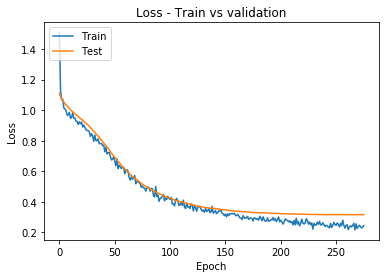

In [47]:
# plot loss - Train vs Valid
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.title('Loss - Train vs validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [33]:
metrics = model.evaluate(train_x, train_y)
print("\n%s: %.2f%%" % (model.metrics_names[0], metrics[0]*100))

  32/1460 [..............................] - ETA: 0s

 576/1460 [==========>...................] - ETA: 0s

1056/1460 [====================>.........] - ETA: 0s

1460/1460 [==============================] - 0s 102us/step



loss: 49.21%
